In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
# Read csv file

amazon = pd.read_csv(r"C:\Users\jbkvk\Downloads\innobyte data analyst project\Amazon Sale Report.csv edit.csv")
amazon


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,06/12/2022,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,06/12/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,06/12/2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,06/12/2022,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,06/12/2022,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,06/01/2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,06/01/2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,06/01/2022,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,06/01/2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


In [3]:
# Display all the column names

amazon.columns 


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [4]:
# Display total number of rows and columns 

amazon.shape


(128976, 21)

In [5]:

print(amazon.dtypes)


index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
fulfilled-by           object
New                   float64
PendingS              float64
dtype: object


In [6]:
########  Convert 'Date' column to datetime  #########

amazon['Date']= pd.to_datetime(amazon['Date'], errors = 'coerce', dayfirst = True)


In [7]:
########  Identify duplicate columns  ###########

duplicate_columns = amazon.duplicated()  # no duplicate columns in this dataset
duplicate_columns


0         False
1         False
2         False
3         False
4         False
          ...  
128971    False
128972    False
128973    False
128974    False
128975    False
Length: 128976, dtype: bool

In [8]:
######## Identify duplicate Rows ############

duplicate_rows = amazon[amazon.duplicated()] # 165 duplicate rows will be there
duplicate_rows


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
201,6,408-5748499-6859555,2022-12-06,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,...,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN,NaN,NaN
202,7,406-7807733-3785945,2022-12-06,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,...,INR,399.0,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship,NaN,NaN
203,8,407-5443024-5233168,2022-12-06,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,...,NaN,0.0,HYDERABAD,TELANGANA,500008.0,IN,False,NaN,NaN,NaN
204,9,402-4393761-0311520,2022-12-06,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,...,INR,363.0,Chennai,TAMIL NADU,600041.0,IN,False,NaN,NaN,NaN
205,10,407-5633625-6970741,2022-12-06,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,...,INR,685.0,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,6278,171-5170733-7855514,2022-08-06,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,XS,Shipped,...,INR,582.0,HYDERABAD,TELANGANA,500083.0,IN,False,Easy Ship,NaN,NaN
6641,6279,403-8137343-5206760,2022-08-06,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,XS,Shipped,...,INR,801.0,KALPETTA,KERALA,673122.0,IN,False,Easy Ship,NaN,NaN
6642,6280,408-1575454-3263526,2022-08-06,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,Blazzer,M,Shipped,...,INR,690.0,CHENNAI,TAMIL NADU,600049.0,IN,False,Easy Ship,NaN,NaN
6643,6281,171-2918708-7197155,2022-08-06,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Blazzer,XXL,Shipped,...,INR,658.0,PUNE,MAHARASHTRA,412207.0,IN,False,Easy Ship,NaN,NaN


In [9]:
######## Remove duplicate rows ############

amazon = amazon.drop_duplicates()
amazon


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,2022-12-06,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,2022-12-06,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,2022-12-06,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,2022-12-06,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,2022-12-06,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,2022-01-06,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,2022-01-06,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,2022-01-06,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,2022-01-06,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


In [10]:
######## Identify missing values ##########

missing_values = amazon.isnull().sum()
print(missing_values)


index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7789
Amount                   134
ship-city                 33
ship-state                33
ship-postal-code          33
ship-country              33
B2B                        0
fulfilled-by           89597
New                   128811
PendingS              128811
dtype: int64


In [11]:
######## Filling the missing values ############

amazon['Amount'].fillna(amazon['Amount'].median(), inplace=True)


C:\Users\jbkvk\AppData\Local\Temp\ipykernel_11256\2255294880.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['Amount'].fillna(amazon['Amount'].median(), inplace=True)


In [12]:

amazon['ship-postal-code']=amazon['ship-postal-code'].fillna(0).astype(int)
print(amazon.dtypes)


index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Category                      object
Size                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code               int32
ship-country                  object
B2B                             bool
fulfilled-by                  object
New                          float64
PendingS                     float64
dtype: object


C:\Users\jbkvk\AppData\Local\Temp\ipykernel_11256\2585726943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['ship-postal-code']=amazon['ship-postal-code'].fillna(0).astype(int)


In [13]:

columns_to_fill=['ship-city','ship-state']              
amazon[columns_to_fill]=amazon[columns_to_fill].fillna('Unknown')


C:\Users\jbkvk\AppData\Local\Temp\ipykernel_11256\469331454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon[columns_to_fill]=amazon[columns_to_fill].fillna('Unknown')


In [14]:
######## Drop columns which contains full null values only ########

amazon.drop(['New','PendingS'],axis=1,inplace=True)


C:\Users\jbkvk\AppData\Local\Temp\ipykernel_11256\4082424925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon.drop(['New','PendingS'],axis=1,inplace=True)


In [15]:
######## Remove columns which contains zero variance ##########

amazon.drop(['currency','ship-country','fulfilled-by'],axis=1,inplace=True)


C:\Users\jbkvk\AppData\Local\Temp\ipykernel_11256\4224181280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon.drop(['currency','ship-country','fulfilled-by'],axis=1,inplace=True)


In [16]:
###### basic data information ######


In [17]:
# provides statistical summary of numerical columns

amazon.describe() 


,index,Date,Qty,Amount,ship-postal-code
count,128811.000000,128811,128811.000000,128811.000000,128811.000000
mean,64563.212047,2022-05-14 12:23:54.399236096,0.904426,610.021438,463839.424420
min,0.000000,2022-01-06 00:00:00,0.000000,0.000000,0.000000
25%,32366.500000,2022-04-17 00:00:00,1.000000,416.000000,382421.000000
50%,64569.000000,2022-05-06 00:00:00,1.000000,587.000000,500033.000000
75%,96771.500000,2022-05-30 00:00:00,1.000000,771.000000,600024.000000
max,128974.000000,2022-12-06 00:00:00,15.000000,5584.000000,989898.000000
std,37194.265658,NaN,0.313359,312.761700,191596.276814


In [18]:
# provides concise summary of DataFrame

amazon.info()     


<class 'pandas.core.frame.DataFrame'>
Index: 128811 entries, 0 to 128975
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128811 non-null  int64         
 1   Order ID            128811 non-null  object        
 2   Date                128811 non-null  datetime64[ns]
 3   Status              128811 non-null  object        
 4   Fulfilment          128811 non-null  object        
 5   Sales Channel       128811 non-null  object        
 6   ship-service-level  128811 non-null  object        
 7   Category            128811 non-null  object        
 8   Size                128811 non-null  object        
 9   Courier Status      128811 non-null  object        
 10  Qty                 128811 non-null  int64         
 11  Amount              128811 non-null  float64       
 12  ship-city           128811 non-null  object        
 13  ship-state          128811 non-nul

In [19]:
# display first 5 rows

amazon.head()      


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
0,0,405-8078784-5731545,2022-12-06,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,1,647.62,MUMBAI,MAHARASHTRA,400081,False
1,1,171-9198151-1101146,2022-12-06,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,560085,False
2,2,404-0687676-7273146,2022-12-06,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210,True
3,3,403-9615377-8133951,2022-12-06,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,PUDUCHERRY,605008,False
4,4,407-1069790-7240320,2022-12-06,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073,False


In [20]:
# display last 5 rows 

amazon.tail()


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
128971,128970,406-6001380-7673107,2022-01-06,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,517.0,HYDERABAD,TELANGANA,500013,False
128972,128971,402-9551604-7544318,2022-01-06,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,999.0,GURUGRAM,HARYANA,122004,False
128973,128972,407-9547469-3152358,2022-01-06,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,690.0,HYDERABAD,TELANGANA,500049,False
128974,128973,402-6184140-0545956,2022-01-06,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,1199.0,Halol,Gujarat,389350,False
128975,128974,408-7436540-8728312,2022-01-06,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,1,696.0,Raipur,CHHATTISGARH,492014,False


In [21]:
# display all the column name 

amazon.columns 


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'B2B'],
      dtype='object')

In [22]:
######### First moment business decision ############

###### Measure of Central tendency #######

# mean #


In [23]:

amazon['Amount'].mean()


610.0214375325089

In [24]:

amazon['Qty'].mean()


0.9044258642507239

In [25]:
# median #

amazon['Amount'].median()


587.0

In [26]:

amazon['Qty'].median()


1.0

In [27]:
# Mode #

amazon['Status'].mode()


0    Shipped
Name: Status, dtype: object

In [28]:

amazon['Fulfilment'].mode()


0    Amazon
Name: Fulfilment, dtype: object

In [29]:

amazon['Sales Channel'].mode()


0    Amazon.in
Name: Sales Channel, dtype: object

In [30]:

amazon['Category'].mode()

0    T-shirt
Name: Category, dtype: object

In [31]:
amazon['ship-state'].mode()

0    MAHARASHTRA
Name: ship-state, dtype: object

In [32]:
######### Second moment business decision ############

###### Measure of dispersion #######

# variance #

In [33]:

amazon['Amount'].var()


97819.88117629236

In [34]:

amazon['Qty'].var()


0.09819413721607577

In [35]:
# standard deviation #

amazon['Amount'].std()


312.7617003027902

In [36]:

amazon['Qty'].std()


0.31335943773257535

In [37]:
# Range #
Range_Amount = amazon['Amount'].max()-amazon['Amount'].min()
Range_Amount

5584.0

In [38]:
Range_Qty = amazon['Qty'].max()-amazon['Qty'].min()
Range_Qty

15

In [39]:
######### Third moment business decision ############

###### Measure of asymmetry #######

# skewness #

In [40]:

amazon['Amount'].skew()


0.44711202524751154

In [41]:

amazon['Qty'].skew()


-0.6958544510965909

In [42]:
######### Fourth moment business decision ############

###### Measure of peakness #######

# kurtosis #

In [43]:

amazon['Amount'].kurt()


1.917389848001982

In [44]:

amazon['Qty'].kurt()


60.428680941783455

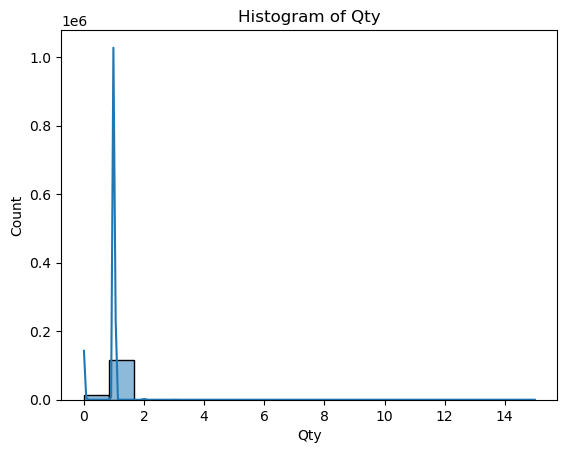

In [45]:
##########  Histogram of Qty  ############

sns.histplot(amazon['Qty'], kde=True)
plt.title('Histogram of Qty')
plt.show()


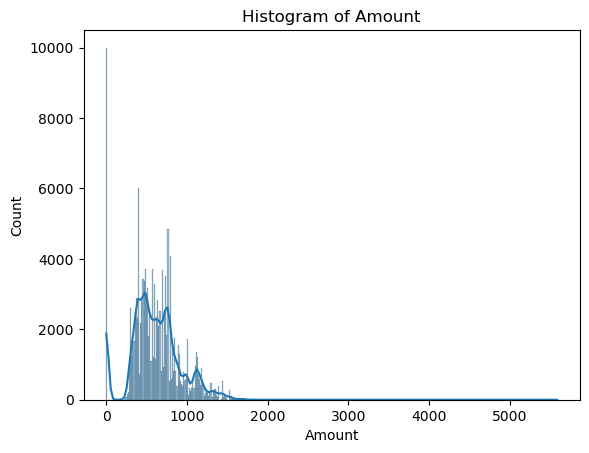

In [46]:
##########  Histogram of Amount  ############

sns.histplot(amazon['Amount'], kde=True)
plt.title('Histogram of Amount')
plt.show()


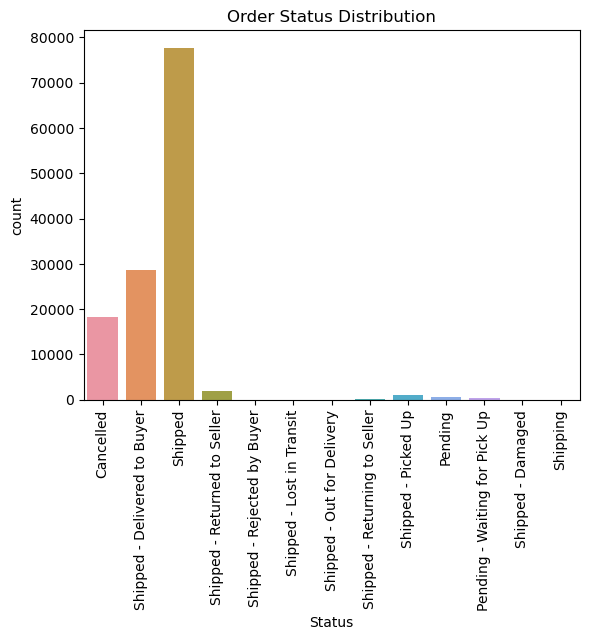

In [47]:
#########  countplot of Status ###########

sns.countplot(x='Status', data=amazon)
plt.title('Order Status Distribution')
plt.xticks(rotation =90)
plt.show()


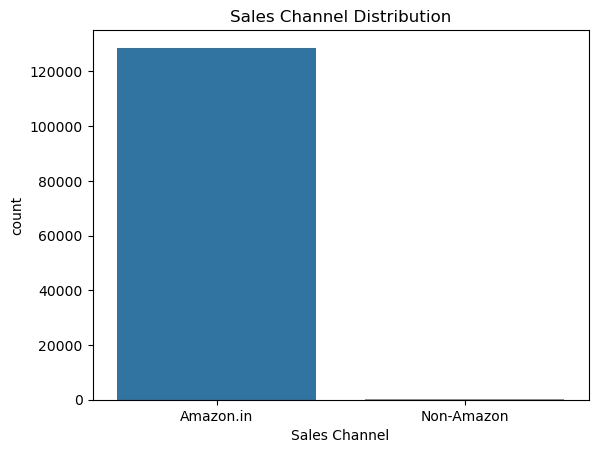

In [48]:
#########  countplot of Sales Channel ###########

sns.countplot(x='Sales Channel', data=amazon)
plt.title('Sales Channel Distribution')
plt.show()


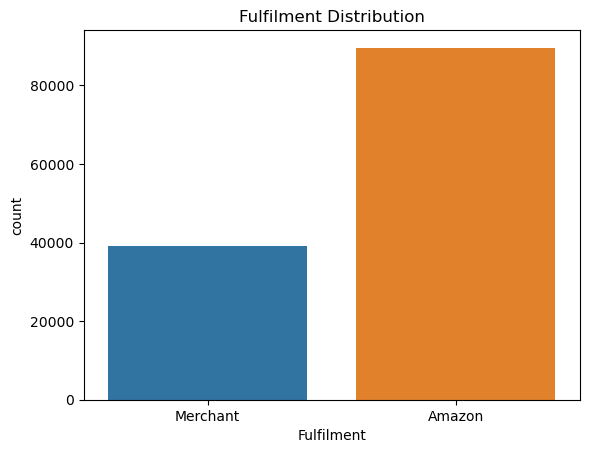

In [49]:
#########  countplot of Fulfilment ###########

sns.countplot(x='Fulfilment', data=amazon)
plt.title('Fulfilment Distribution')
plt.show()

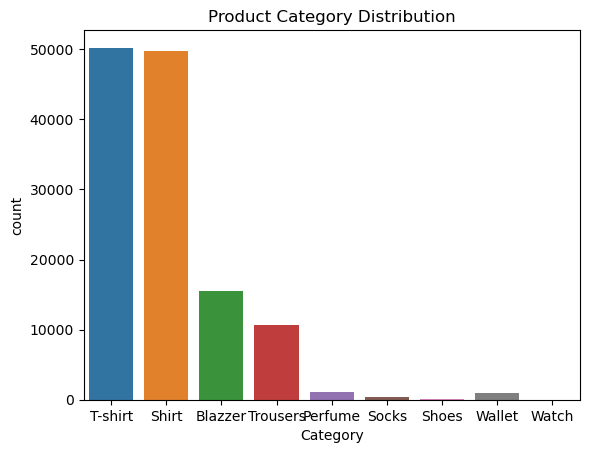

In [50]:
#########  countplot of Category ###########

sns.countplot(x='Category', data=amazon)
plt.title('Product Category Distribution')
plt.show()


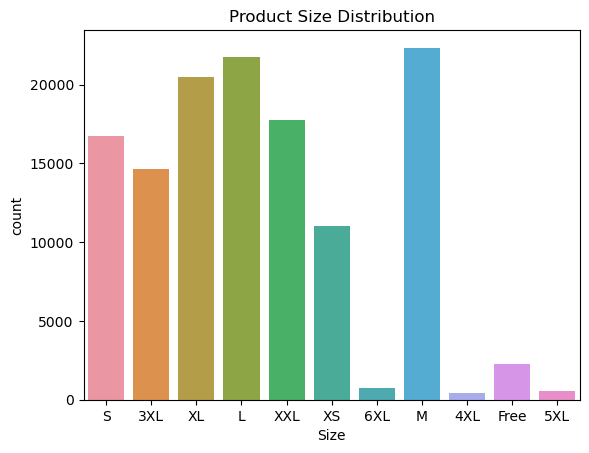

In [51]:
#########  countplot of Size ###########

sns.countplot(x='Size', data=amazon)
plt.title('Product Size Distribution')
plt.show()


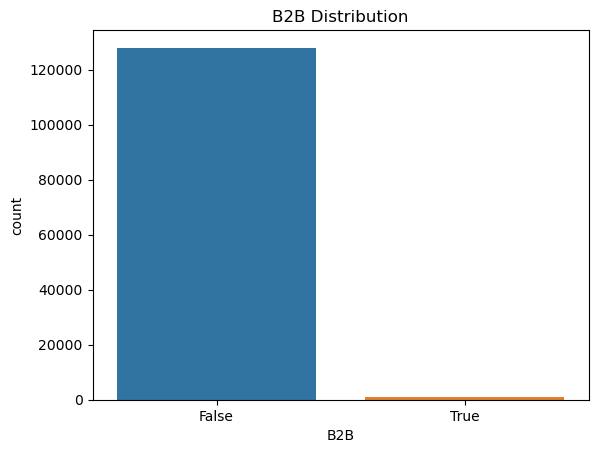

In [52]:
#########  countplot of B2B ###########

sns.countplot(x='B2B', data=amazon)
plt.title('B2B Distribution')
plt.show()


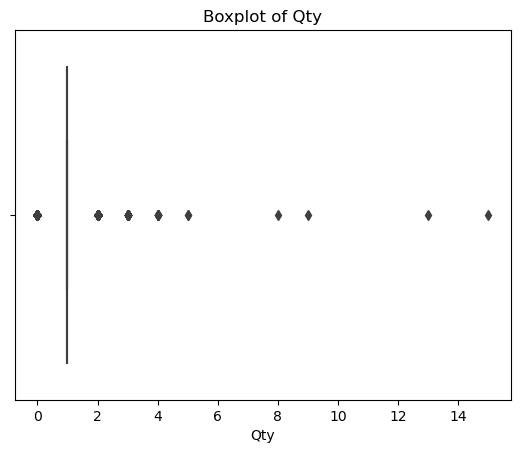

In [53]:
#########  Boxplot of Qty #############

sns.boxplot(x=amazon['Qty'])
plt.title('Boxplot of Qty')
plt.show()


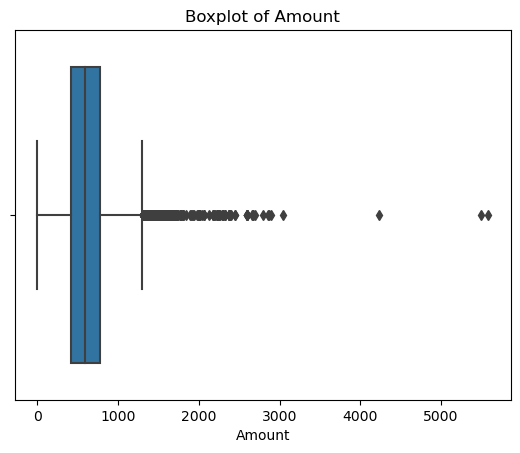

In [54]:
#########  Boxplot of Amount  #############

sns.boxplot(x=amazon['Amount'])
plt.title('Boxplot of Amount')
plt.show()


In [55]:
####### Outlier detection of Amount Column ###########

IQR = amazon['Amount'].quantile(0.75) - amazon['Amount'].quantile(0.25)

lower_limit = amazon['Amount'].quantile(0.25) - (IQR * 1.5)
upper_limit = amazon['Amount'].quantile(0.75) + (IQR * 1.5)
outliers_amazon = np.where(amazon.Amount > upper_limit, True, np.where(amazon.Amount < lower_limit, True, False))
IQR     # these outliers is most important to calculate total sales and hidden patterns in this data set.It was useful for visualizations.so i didn't treat that outliers.


355.0

In [56]:
####### Outlier detection of Qty Column ###########

IQR = amazon['Qty'].quantile(0.75) - amazon['Qty'].quantile(0.25)

lower_limit = amazon['Qty'].quantile(0.25) - (IQR * 1.5)
upper_limit = amazon['Qty'].quantile(0.75) + (IQR * 1.5)
outliers_amazon = np.where(amazon.Qty > upper_limit, True, np.where(amazon.Qty < lower_limit, True, False))
IQR

0.0

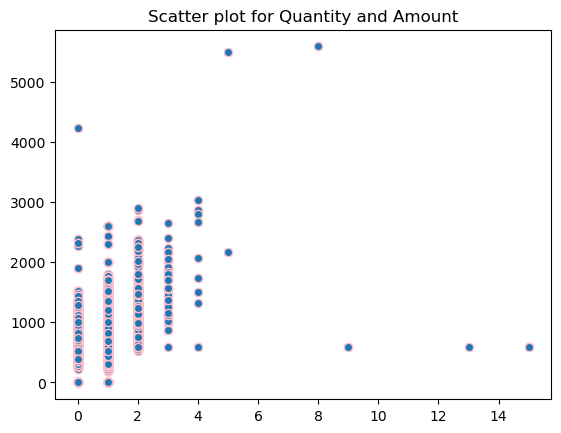

In [57]:
#########  Scatter plot  ###########

plt.scatter(x = amazon['Qty'],y = amazon['Amount'], edgecolors="pink")
plt.title('Scatter plot for Quantity and Amount')   
plt.show()


C:\Users\jbkvk\AppData\Local\Temp\ipykernel_11256\3705005399.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amazon['Qty'], hist = True, kde = True,
C:\Users\jbkvk\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


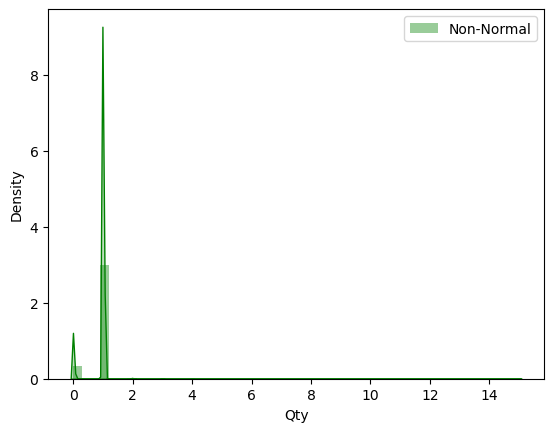

In [58]:
########## Distplot of Qty ###########


sns.distplot(amazon['Qty'], hist = True, kde = True,
             kde_kws = {'shade': True},
             label = "Non-Normal", color = "green")

plt.legend(loc = "upper right")


C:\Users\jbkvk\AppData\Local\Temp\ipykernel_11256\3035366808.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amazon['Amount'], hist = True, kde = True,
C:\Users\jbkvk\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


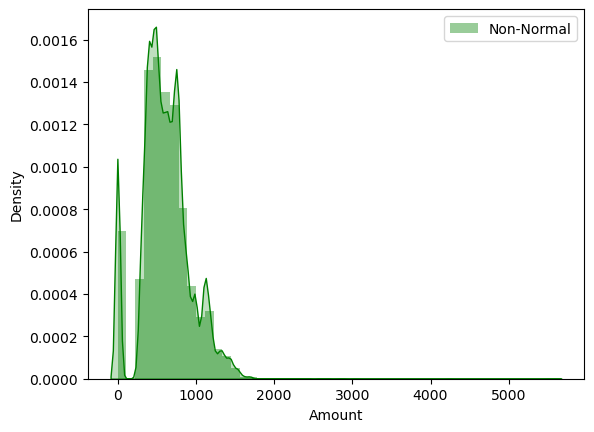

In [59]:
########## Distplot of Amount ###########

sns.distplot(amazon['Amount'], hist = True, kde = True,
             kde_kws = {'shade': True},
             label = "Non-Normal", color = "green")

plt.legend(loc = "upper right")


((array([-4.40126403, -4.20486788, -4.09813047, ...,  4.09813047,
          4.20486788,  4.40126403]),
  array([ 0,  0,  0, ...,  9, 13, 15], dtype=int64)),
 (0.1865604799211106, 0.904425864250724, 0.5953378169541639))

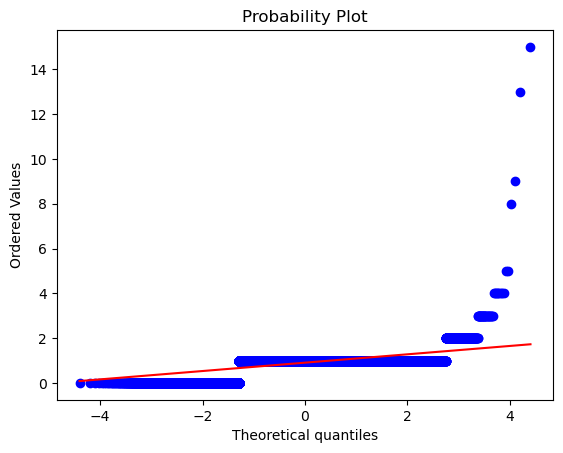

In [60]:
#########  Q-Q Plot of Qty ###########

stats.probplot(amazon.Qty, dist = "norm", plot = plt)


((array([-4.40126403, -4.20486788, -4.09813047, ...,  4.09813047,
          4.20486788,  4.40126403]),
  array([   0.  ,    0.  ,    0.  , ..., 4235.72, 5495.  , 5584.  ])),
 (307.276309912185, 610.021437532509, 0.982431124328921))

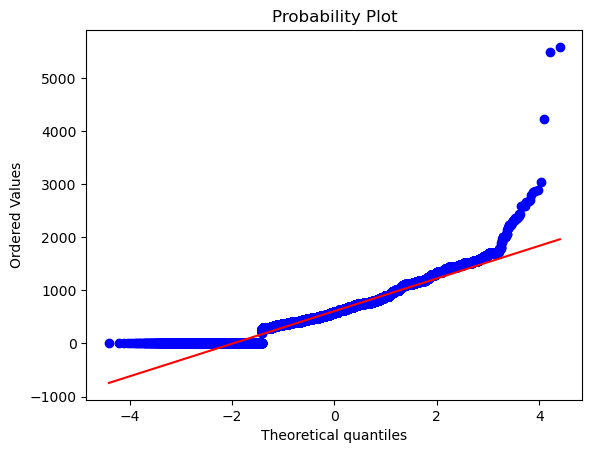

In [61]:
#########  Q-Q Plot of Amount ###########

stats.probplot(amazon.Amount, dist = "norm", plot = plt)


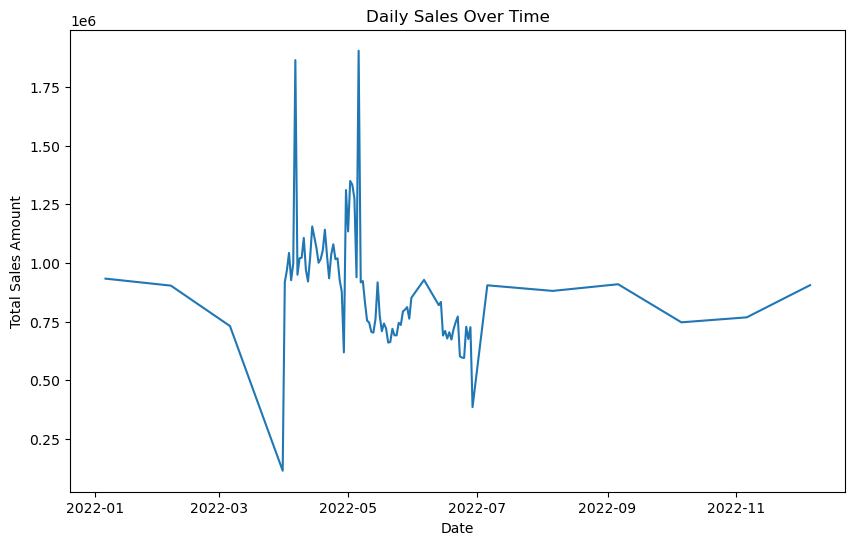

In [62]:
######### Daily sales over time  #########

daily_sales = amazon.groupby(amazon['Date'].dt.date)['Amount'].sum()
plt.figure(figsize=(10, 6))
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
daily_sales.plot()
plt.show()


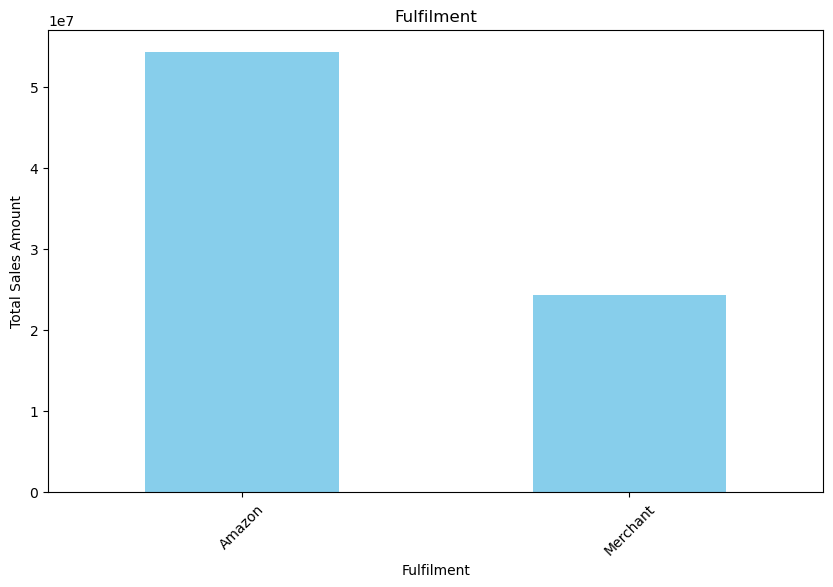

In [63]:

sales_channel_sales = amazon.groupby('Fulfilment')['Amount'].sum()
sales_channel_sales.plot(kind='bar', figsize=(10, 6), title='Fulfilment', color='skyblue')
plt.xlabel('Fulfilment')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()


In [64]:
#########  Auto eda  ###########

# sweetviz #

# pip install sweetviz #

import sweetviz as sv
 
s = sv.analyze(amazon)
s.show_html()


                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
